In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
chick = pd.read_csv('/home/atrides/Desktop/R/statistics_with_Python/06_Correlation/Smart_Alex/Data_Files/ChickFlick.dat', sep='\t')
chick.head()

,gender,film,arousal
0,Male,Bridget Jones' Diary,22
1,Male,Bridget Jones' Diary,13
2,Male,Bridget Jones' Diary,16
3,Male,Bridget Jones' Diary,10
4,Male,Bridget Jones' Diary,18


In [3]:
gender_en = {"Male":1, "Female":2}
film_en = {"Bridget Jones' Diary":1, "Memento":2}

chick['gender_en'] = chick['gender'].map(gender_en)
chick['film_en'] = chick['film'].map(film_en)

In [4]:
chick.head()

,gender,film,arousal,gender_en,film_en
0,Male,Bridget Jones' Diary,22,1,1
1,Male,Bridget Jones' Diary,13,1,1
2,Male,Bridget Jones' Diary,16,1,1
3,Male,Bridget Jones' Diary,10,1,1
4,Male,Bridget Jones' Diary,18,1,1


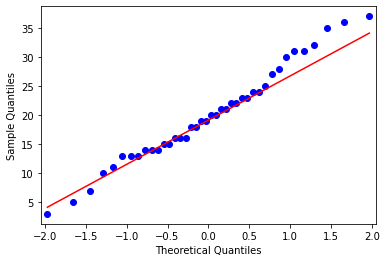

In [5]:
_ = sm.qqplot(chick['arousal'], line='q')

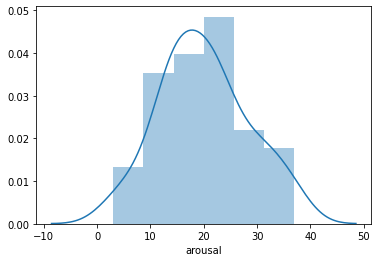

In [6]:
_ = sns.distplot(chick['arousal'])

In [7]:
st.shapiro(chick['arousal'])

(0.9800150394439697, 0.6901128888130188)

### Since, we have dichotomous variables , we need to calculate pointbiserial correlation

In [8]:
st.pointbiserialr(chick['gender_en'], chick['arousal'])

PointbiserialrResult(correlation=-0.18016716046145592, pvalue=0.26593265491614115)

In [9]:
st.pointbiserialr(chick['film_en'], chick['arousal'])

PointbiserialrResult(correlation=0.6382192633295641, pvalue=9.400044974655e-06)

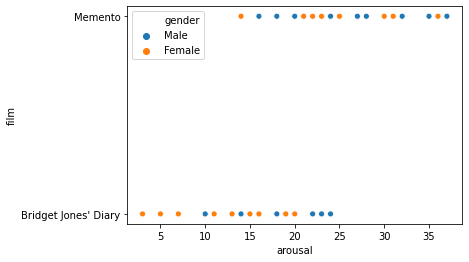

In [10]:
_ = sns.scatterplot(data=chick, x='arousal', y='film',hue='gender')

#### In both cases I used a two-tailed test because no prediction was made. As you can see,there was no significant relationship between gender and arousal, rpb = –.18, ns. However, there was a significant relationship between the film watched and arousal, rpb = –.64, p < .001. Looking at how the groups were coded, you should see that Bridget Jones’s Diary had a code of 1, and Memento had a code of 2, therefore this result reflects the fact that as film goes up (changes from 1 to 2) arousal goes up. Put another way, as the film changes from Bridget Jones’s Diary to Memento, arousal increases. So, Memento gave rise to the greater arousal levels